# Exercise 1

Analyzing "Sounds/169289__qubodup__gong-bell-monkay-s-singing-bowl-modified.wav"


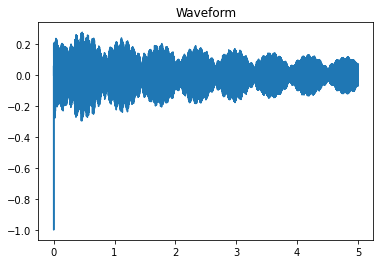

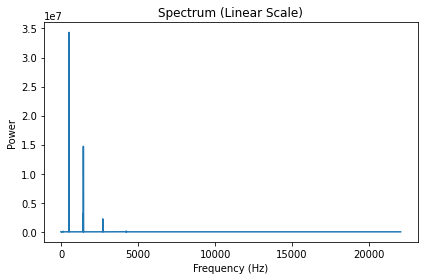

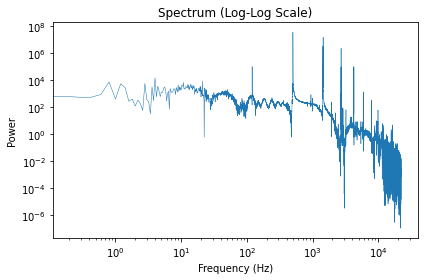

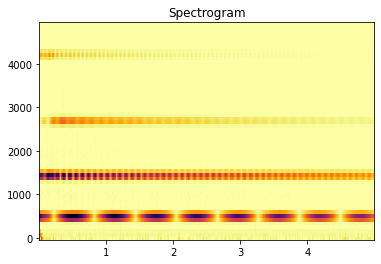

Analyzing "Sounds/22604__martypinso__dmp010037-crickets-texas.wav"


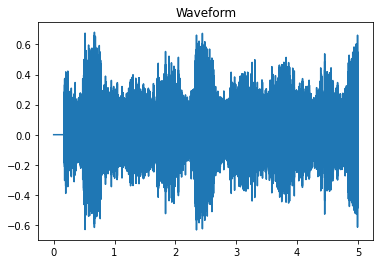

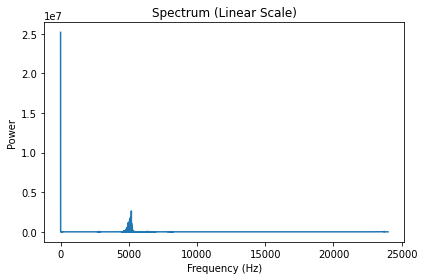

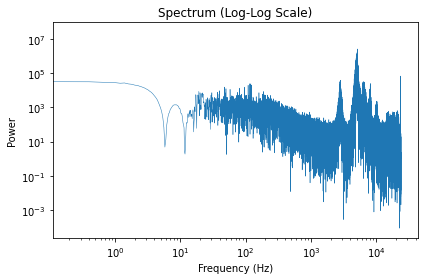

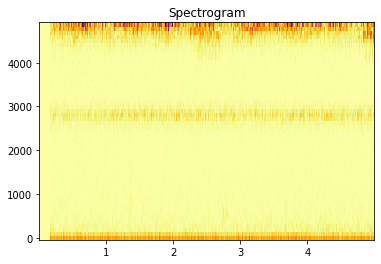

Analyzing "Sounds/136977__audionautics__crowd-long.wav"


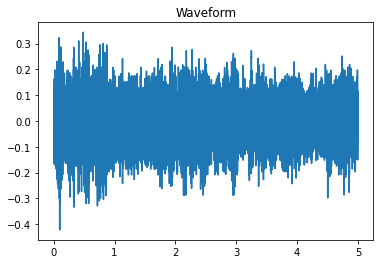

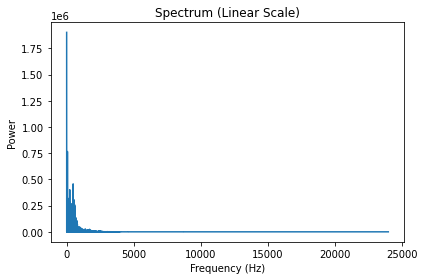

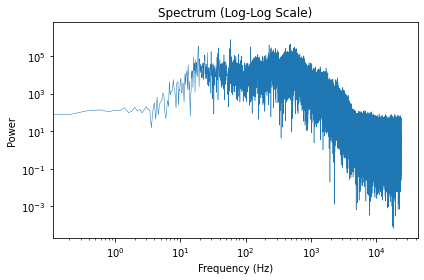

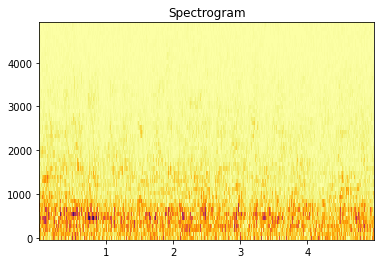

[<IPython.lib.display.Audio object>,
 <IPython.lib.display.Audio object>,
 <IPython.lib.display.Audio object>]

In [1]:
from thinkdsp import Signal, Sinusoid, SquareSignal, TriangleSignal, SawtoothSignal, ParabolicSignal
from thinkdsp import normalize, unbias, PI2, decorate
from thinkdsp import Chirp
from thinkdsp import read_wave

import numpy as np

from matplotlib import pyplot

files = [
    'Sounds/169289__qubodup__gong-bell-monkay-s-singing-bowl-modified.wav',
    'Sounds/22604__martypinso__dmp010037-crickets-texas.wav',
    'Sounds/136977__audionautics__crowd-long.wav',
]

def analyze(file):
    print(f'Analyzing "{file}"')
    wave = read_wave(file)
    segment = wave.segment(start=0, duration=5)
    pyplot.title('Waveform')
    segment.plot()
    pyplot.show()

    spectrum = segment.make_spectrum()
    
    pyplot.title('Spectrum (Linear Scale)')
    spectrum.plot_power()
    decorate(
        xlabel='Frequency (Hz)',
        ylabel='Power',
    )
    pyplot.show()
    
    pyplot.title('Spectrum (Log-Log Scale)')
    spectrum.plot_power(linewidth=0.5)
    loglog = dict(xscale='log', yscale='log')
    decorate(
        xlabel='Frequency (Hz)',
        ylabel='Power',
        **loglog
    )
    pyplot.show()
    
    pyplot.title('Spectrogram')
    segment.make_spectrogram(512).plot(high=5000)
    pyplot.show()
    
    return segment.make_audio()

[analyze(it) for it in files]

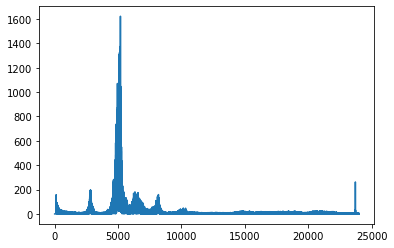

In [13]:
wave = read_wave('Sounds/22604__martypinso__dmp010037-crickets-texas.wav')
spectrum = wave.segment(start=0, duration=5).make_spectrum()
spectrum.high_pass(100)
spectrum.plot()

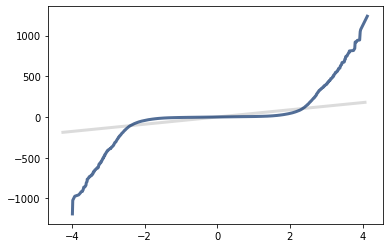

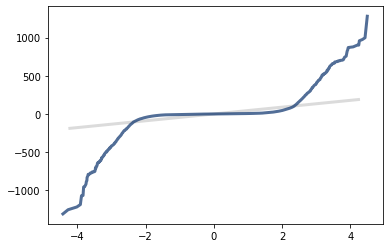

In [19]:
import thinkstats2

thinkstats2.NormalProbabilityPlot(spectrum.real)
pyplot.figure()
thinkstats2.NormalProbabilityPlot(spectrum.imag)

# Exercise 2

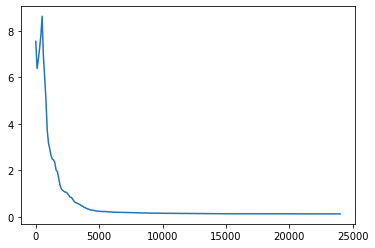

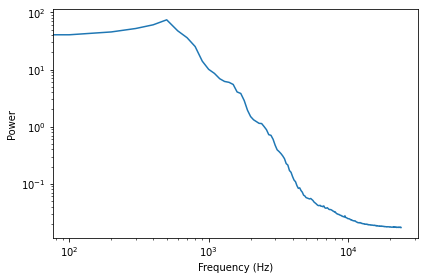

In [89]:
import numpy

# wave = read_wave('Sounds/136977__audionautics__crowd-long.wav')

TIME_INTERVAL = 6 * 60
DURATION = 0.01
SAMPLES_COUNT = int(TIME_INTERVAL / DURATION)

summed = numpy.zeros((int(24001 * DURATION + 1)))

for it in range(SAMPLES_COUNT):
    spectrum = wave.segment(start=it * DURATION, duration=DURATION).make_spectrum()
    summed += spectrum.power
    
result = numpy.sqrt(summed / SAMPLES_COUNT)

pyplot.figure()
pyplot.plot(spectrum.fs, result)
pyplot.show()

average_spectrum = Spectrum(result, spectrum.fs, wave.framerate)

# pyplot.figure()
# average_spectrum.plot()

loglog = dict(xscale='log', yscale='log')

pyplot.figure()
average_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', 
         ylabel='Power', 
         **loglog)

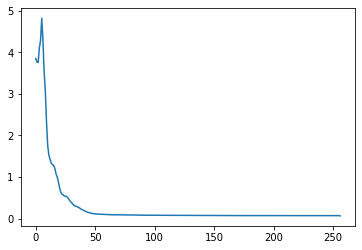

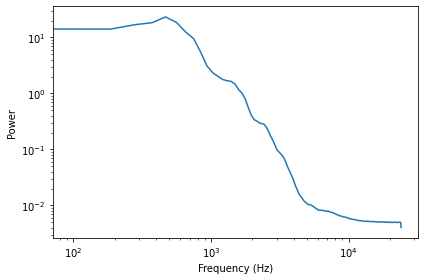

In [90]:
from thinkdsp import Spectrum

spectrogram = wave.make_spectrogram(seg_length=512, win_flag=True)
spectrums = spectrogram.spec_map.values()
powers = numpy.array([spectrum.power for spectrum in spectrums])
averaged_powers = numpy.sum(numpy.sqrt(powers) / len(powers), axis=0)

pyplot.figure()
pyplot.plot(numpy.arange(0, len(powers[0])), averaged_powers)
pyplot.show()

average_spectrum = Spectrum(averaged_powers, next(iter(spectrums)).fs, wave.framerate)

# pyplot.figure()
# average_spectrum.plot()

loglog = dict(xscale='log', yscale='log')

pyplot.figure()
average_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', 
         ylabel='Power', 
         **loglog)

# Exercise 3 

In [94]:
import pandas

data = pandas.read_csv('Data/BTC_USD_2020-12-31_2021-03-30-CoinDesk.csv')
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-12-31,28768.836208,27349.327233,28928.214391,27349.283204
1,BTC,2021-01-01,29111.521567,28872.829775,29280.045328,27916.625059
2,BTC,2021-01-02,29333.605121,28935.810981,29601.594898,28753.412314
3,BTC,2021-01-03,32154.167363,29353.640608,33064.673534,29012.927887
4,BTC,2021-01-04,33002.536427,32074.106611,34452.080337,31885.581619
...,...,...,...,...,...,...
85,BTC,2021-03-26,52173.867980,52335.565034,53209.406384,50458.099965
86,BTC,2021-03-27,54483.045732,51344.048980,54806.881514,51286.291177
87,BTC,2021-03-28,56234.356105,55067.824399,56520.307287,54022.076941
88,BTC,2021-03-29,55343.925815,55843.748916,56541.006527,54741.626373


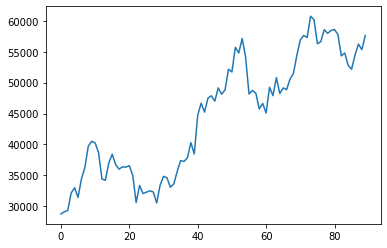

In [96]:
from thinkdsp import Wave

wave = Wave(data['Closing Price (USD)'], data.index, framerate=1)
wave.plot()

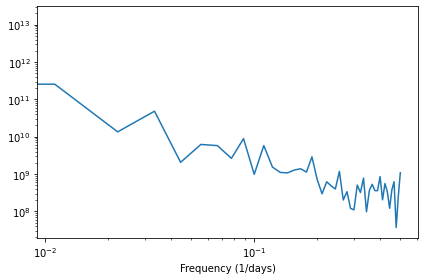

In [97]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)', **loglog)

In [98]:
spectrum.estimate_slope()[0]

-1.6128256161954582

# Exercise 4

In [100]:
from thinkdsp import Noise

class MyUncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = numpy.random.poisson(self.amp, len(ts))
        return ys
    
signal = MyUncorrelatedPoissonNoise(amp=0.001)
wave = signal.make_wave(duration=10, framerate=10_000)
wave.make_audio()

In [101]:
sum(wave.ys), 0.001 * 10_000 * 10

(108, 100.0)

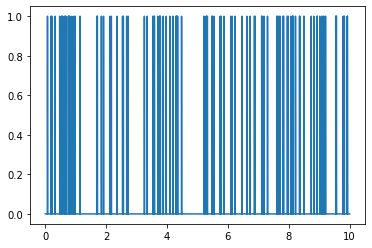

In [102]:
wave.plot()

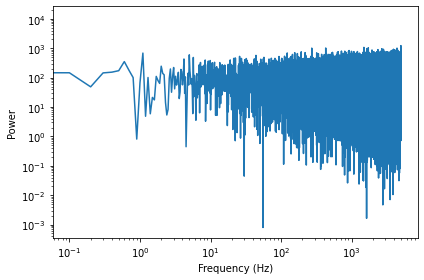

In [103]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [104]:
spectrum.estimate_slope().slope

0.003588744475416015

# Exercise 5

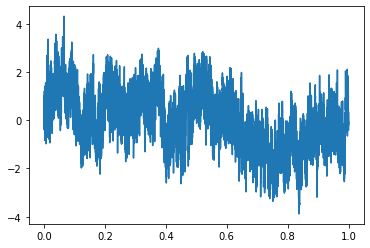

In [113]:
def voss(rows, columns=16):
    array = numpy.empty((rows, columns))
    array.fill(numpy.nan)
    
    array[0, :] = numpy.random.random(columns)
    array[:, 0] = numpy.random.random(rows)
    
    target_columns = numpy.random.geometric(0.5, rows)
    target_columns[target_columns >= columns] = 0
    
    target_rows = numpy.random.randint(rows, size=rows)
    
    array[target_rows, target_columns] = numpy.random.random(rows)

    dataframe = pandas.DataFrame(array)
    dataframe.fillna(method='ffill', axis=0, inplace=True)
    
    total = dataframe.sum(axis=1)
    return total.values

wave = Wave(voss(11025))
wave.unbias()
wave.plot()
wave.make_audio()

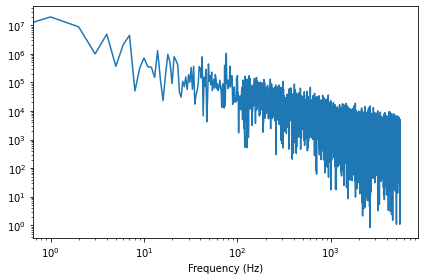

In [115]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         **loglog)

In [116]:
spectrum.estimate_slope().slope

-1.0086281113773163